# Machine Learning Lab PROJECT


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
adv = pd.read_csv('advertising.csv')

In [3]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [42]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  992 non-null    float64
 1   Age                       992 non-null    int64  
 2   Area Income               992 non-null    float64
 3   Daily Internet Usage      992 non-null    float64
 4   Ad Topic Line             992 non-null    object 
 5   City                      992 non-null    object 
 6   Male                      992 non-null    int64  
 7   Country                   992 non-null    object 
 8   Timestamp                 992 non-null    object 
 9   Clicked on Ad             992 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 85.2+ KB


<AxesSubplot:>

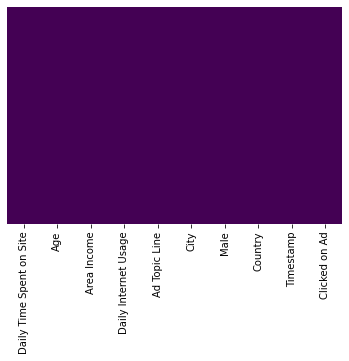

In [4]:
# checking of null values 
sns.heatmap(adv.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#it does not have any null value

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


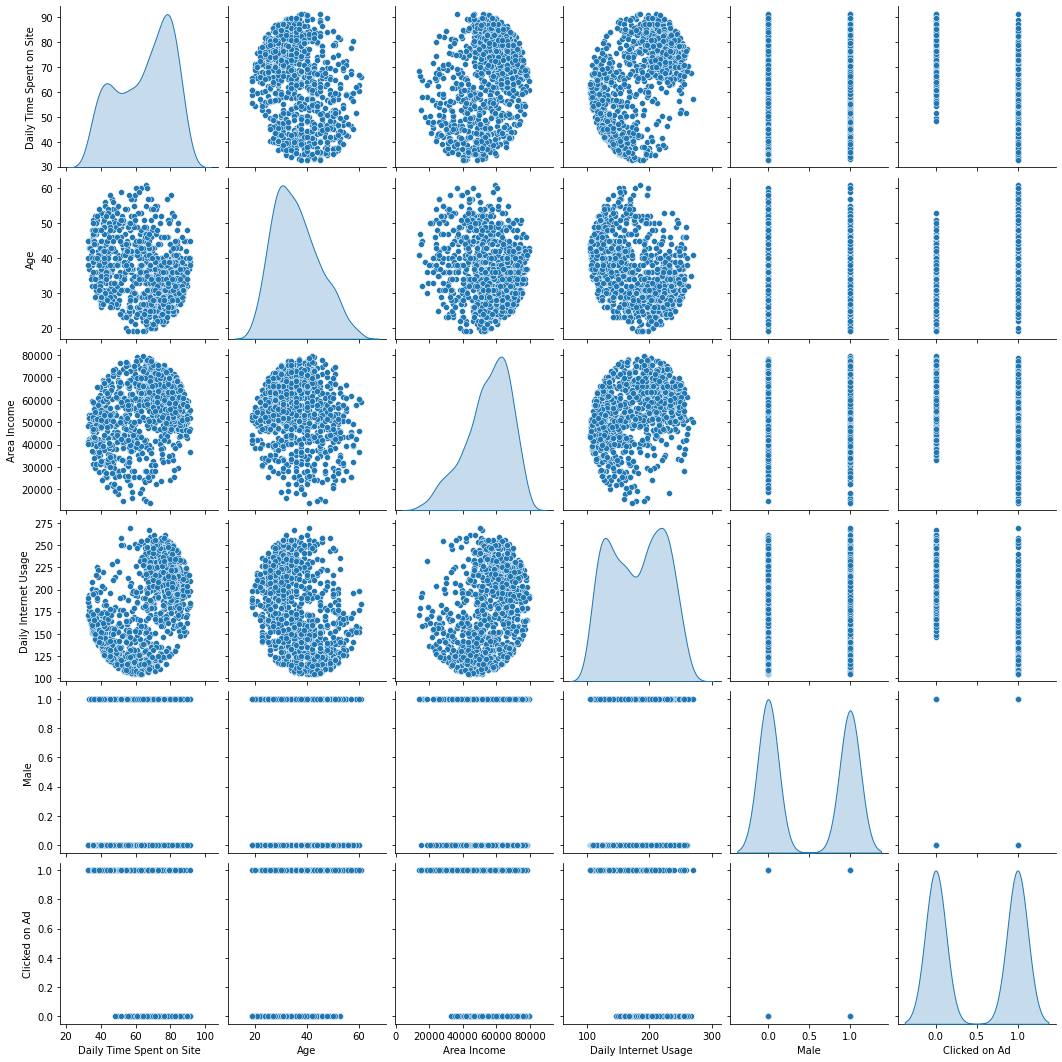

In [7]:
sns.pairplot(adv,diag_kind='kde')

In [8]:
adv

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [9]:
adv.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

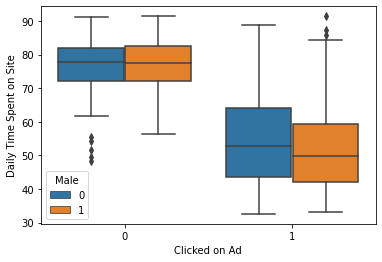

In [10]:
sns.boxplot(x='Clicked on Ad',y='Daily Time Spent on Site',data=adv,hue='Male')


In [11]:
Q1 = np.percentile(adv['Daily Time Spent on Site'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(adv['Daily Time Spent on Site'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", adv.shape)
 
# Upper bound
upper = np.where(adv['Daily Time Spent on Site'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(adv['Daily Time Spent on Site'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
adv.drop(upper[0], inplace = True)
adv.drop(lower[0], inplace = True)
 
print("New Shape: ", adv.shape)

Old Shape:  (1000, 10)
New Shape:  (1000, 10)


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

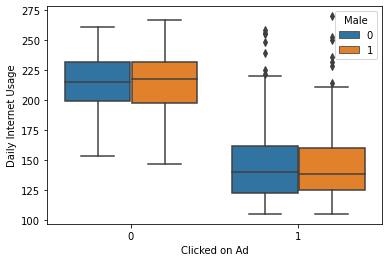

In [12]:
sns.boxplot(x='Clicked on Ad',y='Daily Internet Usage',data=adv,hue='Male')

In [13]:
Q1 = np.percentile(adv['Daily Internet Usage'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(adv['Daily Internet Usage'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", adv.shape)
 
# Upper bound
upper = np.where(adv['Daily Internet Usage'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(adv['Daily Internet Usage'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
adv.drop(upper[0], inplace = True)
adv.drop(lower[0], inplace = True)
 
print("New Shape: ", adv.shape)

Old Shape:  (1000, 10)
New Shape:  (1000, 10)


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Area Income'>

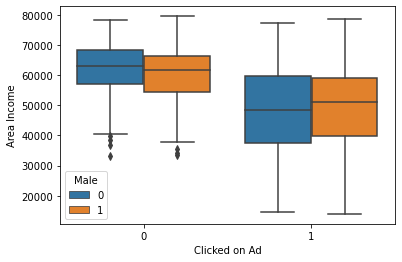

In [14]:
sns.boxplot(x='Clicked on Ad',y='Area Income',data=adv,hue='Male')

In [15]:
Q1 = np.percentile(adv['Area Income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(adv['Area Income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", adv.shape)
 
# Upper bound
upper = np.where(adv['Area Income'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(adv['Area Income'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
adv.drop(upper[0], inplace = True)
adv.drop(lower[0], inplace = True)
 
print("New Shape: ", adv.shape)

Old Shape:  (1000, 10)
New Shape:  (992, 10)


#### By looking at the box plots the we have some data which look like a outlier but it is not because there are very much possibility the time spend on internet can be higher and daily internet usage is also higher

### Now its time to apply algorithm and computing its confusion matrix and classification report and seprating data into training set and test set

In [16]:
adv.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [17]:
X = adv[['Daily Time Spent on Site','Area Income','Daily Internet Usage']]

In [18]:
y = adv['Clicked on Ad']

In [19]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### 1--> LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg = LogisticRegression()

In [22]:
# Training and predicting

lg.fit(X_train,y_train)
lg_prediction= lg.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.87      0.72        97
           1       0.79      0.49      0.61       102

    accuracy                           0.67       199
   macro avg       0.71      0.68      0.66       199
weighted avg       0.71      0.67      0.66       199



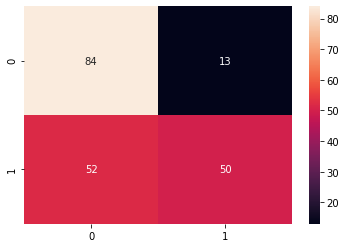

In [23]:
# checking confusion matrix and classification report

sns.heatmap(confusion_matrix(y_test,lg_prediction),annot=True)
print(classification_report(y_test,lg_prediction))

### 2--> KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)


              precision    recall  f1-score   support

           0       0.71      0.85      0.77        97
           1       0.82      0.68      0.74       102

    accuracy                           0.76       199
   macro avg       0.77      0.76      0.76       199
weighted avg       0.77      0.76      0.76       199



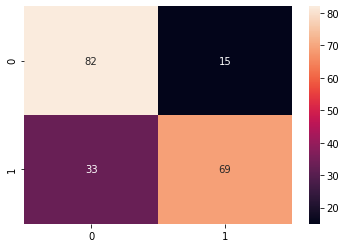

In [26]:
# checking confusion matric and classifictaion report

sns.heatmap(confusion_matrix(y_test,knn_predictions),annot=True)
print(classification_report(y_test,knn_predictions))

### 3--> Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_predictions = dtree.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        97
           1       0.92      0.95      0.94       102

    accuracy                           0.93       199
   macro avg       0.94      0.93      0.93       199
weighted avg       0.94      0.93      0.93       199



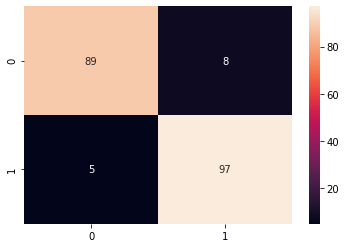

In [29]:
# evaluating confusion matric and classification report

sns.heatmap(confusion_matrix(y_test,dtree_predictions),annot=True)
print(classification_report(y_test,dtree_predictions))

### 4--> Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_predictions = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        97
           1       0.95      0.94      0.95       102

    accuracy                           0.94       199
   macro avg       0.94      0.94      0.94       199
weighted avg       0.94      0.94      0.94       199



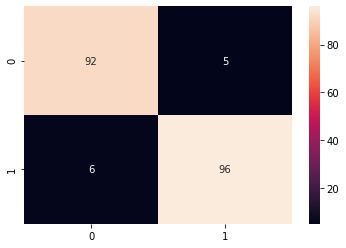

In [32]:
# evaluating confusion matrix and classification report

sns.heatmap(confusion_matrix(y_test,rfc_predictions),annot=True)
print(classification_report(y_test,rfc_predictions))

### 5--> SUPPORT VECTOR MACHINE

In [33]:
"""before applying algorithm first we have to choose values of C and gamma using GridSearch to get good 
performance of model"""


'before applying algorithm first we have to choose values of C and gamma using GridSearch to get good \nperformance of model'

In [34]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [36]:
svm = SVC()

In [37]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [38]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
# this will give best suited values of C and gamma for this training dataset 
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [40]:
grid_predictions = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        97
           1       0.82      0.85      0.84       102

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



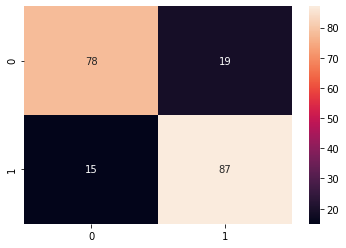

In [41]:
sns.heatmap(confusion_matrix(y_test,grid_predictions),annot = True)
print(classification_report(y_test,grid_predictions))

### By obersving all the algorithm and trainig each algorithm with the dataset we come to know that 
### Decision Tree and Random forest algorithm are performing best among all algorithm 
### Hence we will use Random forest and Decision Tree for deploying model